In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import seaborn as sns



In [2]:
dfr= pd.read_csv('iris.csv')

In [3]:
print("\nInitial data info:")
print(dfr.info())


Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
print("\nChecking for missing values:")
print(dfr.isnull().sum())


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
dfr_cleaned = dfr.dropna()

In [11]:
# Validate data types
print("\nData types:")
print(dfr_cleaned.dtypes)


Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [13]:
 # Check for duplicates
duplicateValues = dfr.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicateValues}")


Number of duplicate rows: 3


In [15]:
# Remove duplicates if any
dfr= dfr.drop_duplicates()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_7984\246301827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


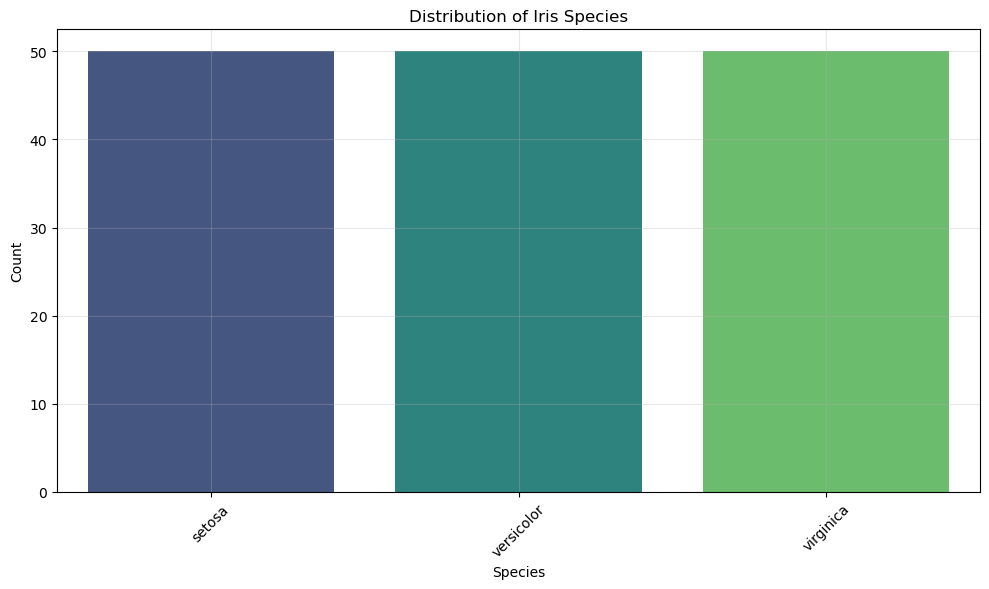

In [17]:

def species(data):
    
    plt1.figure(figsize=(10, 6))
    
    # Create the count plot
    sns.countplot(
        data=data,
        x='species',
        palette='viridis'
    )
    
    # Customize the plot
    plt1.title('Distribution of Iris Species', fontsize=12)
    plt1.xlabel('Species')
    plt1.ylabel('Count')
    plt1.xticks(rotation=45)
    plt1.grid(True, alpha=0.3)
    
    # Adjust layout and display
    plt1.tight_layout()
    plt1.savefig('species_distribution.png')
    plt1.show()

if __name__ == "__main__":
    dfr = pd.read_csv('iris.csv')
    species(dfr)

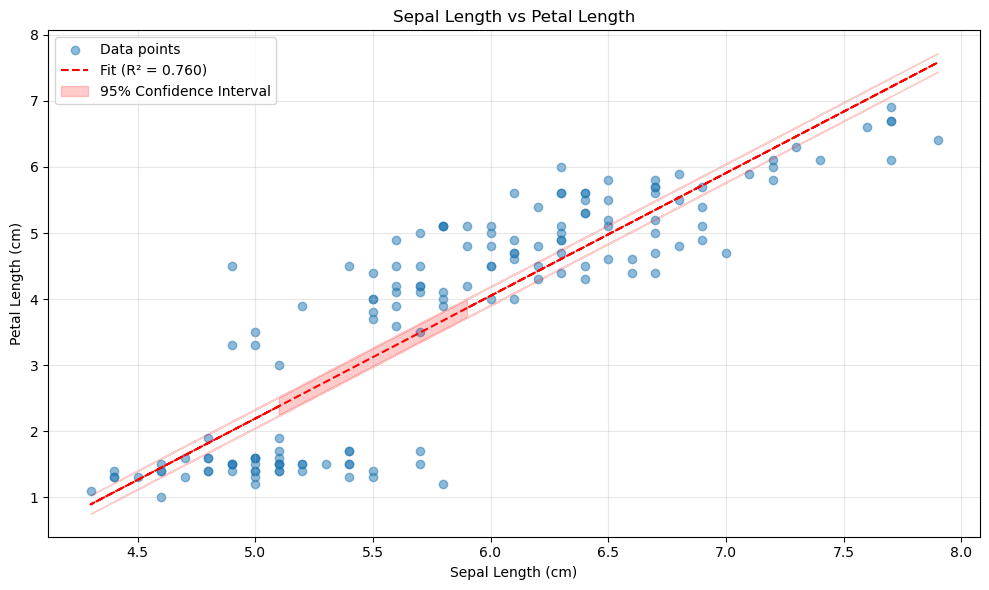

In [19]:
from scipy import stats
def scatter_with_fitting(data):
    
  
    plt1.figure(figsize=(10, 6))
   
    x = data['sepal_length']
    y = data['petal_length']
    
   
    plt1.scatter(x, y, alpha=0.5, label='Data points')
    
    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    y_fit = slope * x + intercept
    
    plt1.plot(x, y_fit, 'r--', label=f'Fit (R² = {r_value**2:.3f})')
    
    
    confidence = 0.95
    degrees_of_freedom = len(x) - 2
    t_value = stats.t.ppf((1 + confidence) / 2, degrees_of_freedom)
    
    sigma = np.sqrt(np.sum((y - y_fit) ** 2) / degrees_of_freedom)
    std_error = sigma * np.sqrt(1/len(x))
    
    plt1.fill_between(x, y_fit - t_value*std_error, 
                     y_fit + t_value*std_error, 
                     alpha=0.2, color='red',
                     label='95% Confidence Interval')
    
  
    plt1.title('Sepal Length vs Petal Length')
    plt1.xlabel('Sepal Length (cm)')
    plt1.ylabel('Petal Length (cm)')
    plt1.grid(True, alpha=0.3)
    plt1.legend()
    
    plt1.tight_layout()
    plt1.savefig('scatter_fit.png')
    plt1.show()

if __name__ == "__main__":
    
    dfr = pd.read_csv('iris.csv')
    scatter_with_fitting(dfr)

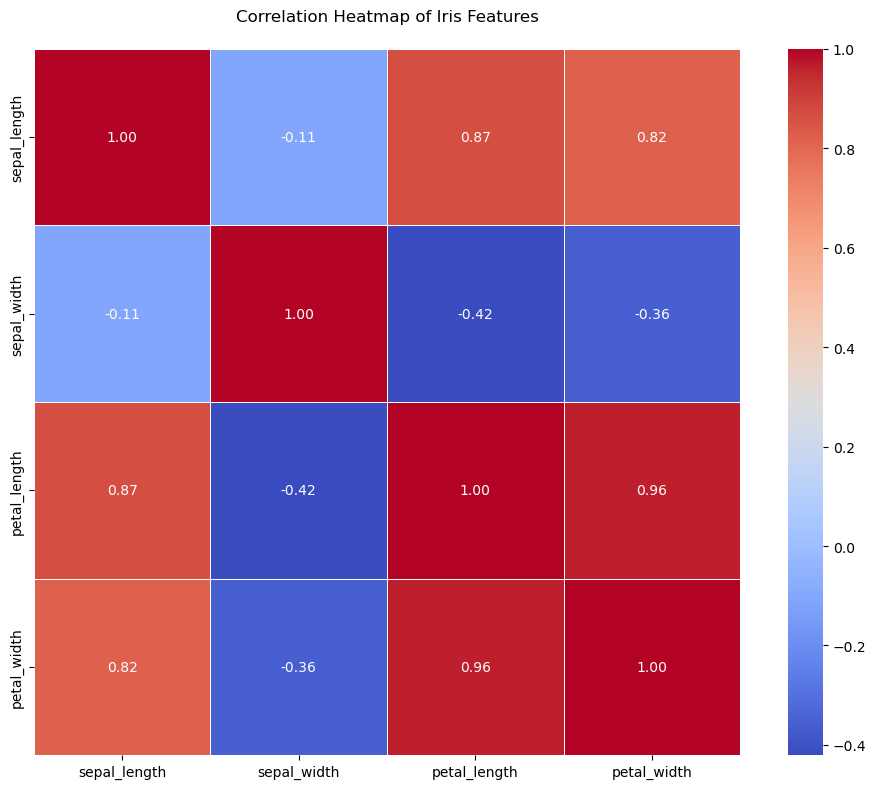


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [21]:

def correlation_heatmap(data):
 
    plt1.figure(figsize=(10, 8))
    
    
    numericcolumns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    correlationvalues = data[numericcolumns].corr()
    

    sns.heatmap(correlationvalues, 
                annot=True,              
                cmap='coolwarm',         
                fmt='.2f',              
                square=True,            
                linewidths=0.5)             
    
    plt1.title('Correlation Heatmap of Iris Features', pad=20)
    plt1.tight_layout()
    
    
    plt1.savefig('correlation_heatmap.png')
    plt1.show()
    
    return correlationvalues


if __name__ == "__main__":
   
    correlationmatrix = correlation_heatmap(dfr)
    print("\nCorrelation Matrix:")
    print(correlationmatrix)

C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

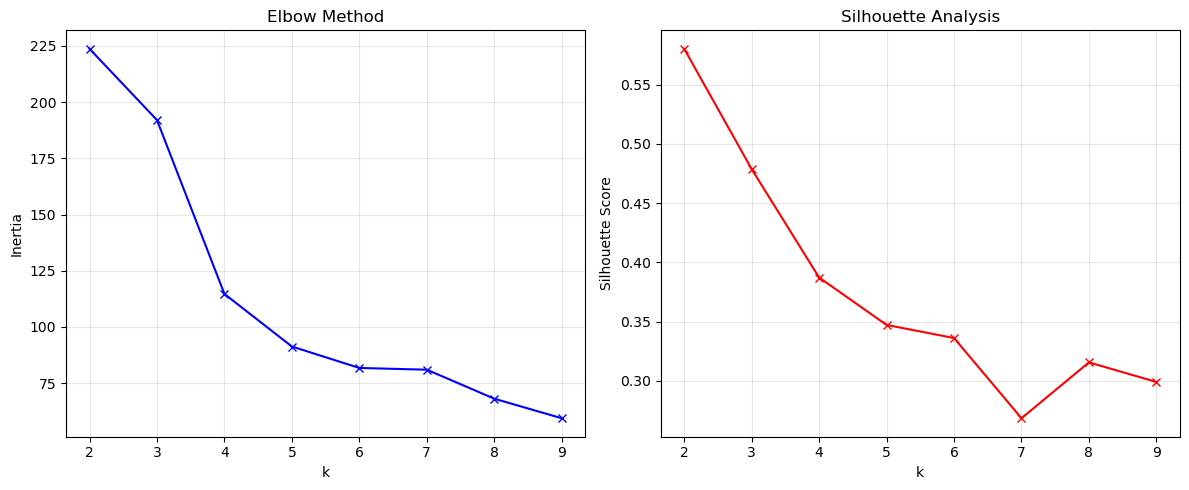

Optimal number of clusters (k): 2
Best silhouette score: 0.580


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def clustering_analysis(data):
  
  
    X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
   
    inertias = []
    silhouette_scores = []
    K = range(2, 10) 
    
    for k in K:
        # Fit KMeans and calculate metrics
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    fig, (ax1, ax2) = plt1.subplots(1, 2, figsize=(12, 5))
    
    
    ax1.plot(K, inertias, 'bx-', label='Inertia')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    ax1.grid(True, alpha=0.3)
    
    
    ax2.plot(K, silhouette_scores, 'rx-', label='Silhouette Score')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    ax2.grid(True, alpha=0.3)
    
    plt1.tight_layout()
    plt1.savefig('clustering_analysis.png')
    plt1.show()
    
    optimal_k = K[np.argmax(silhouette_scores)]
    best_score = max(silhouette_scores)
    
    print(f"Optimal number of clusters (k): {optimal_k}")
    print(f"Best silhouette score: {best_score:.3f}")
    
    return optimal_k, best_score
if __name__ == "__main__":

    optimal_k, best_score = clustering_analysis(dfr)

C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


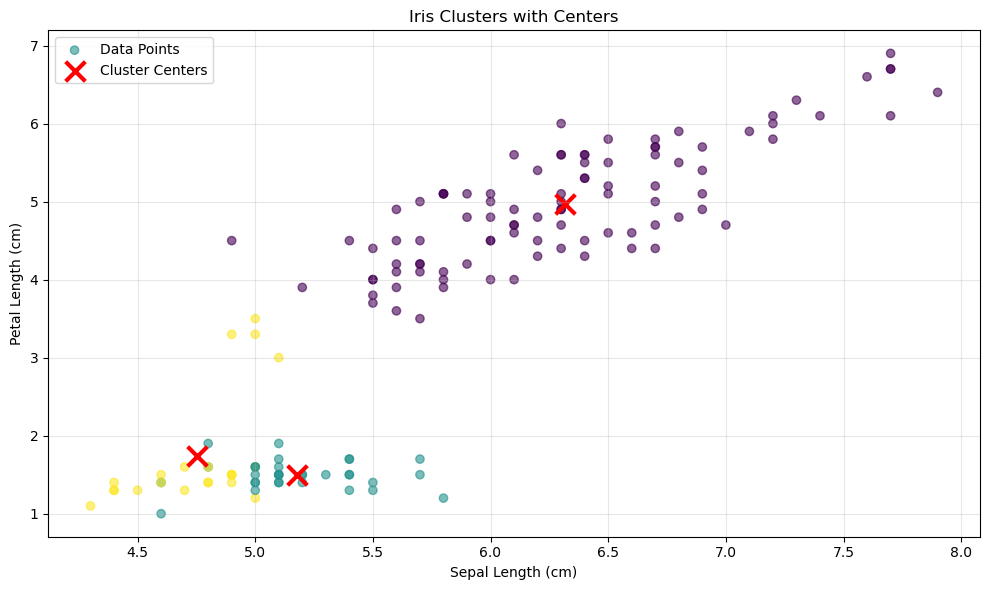


Example predictions for new points:
Predictions for new points: [1 0]


C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
def kmeans_clustering(data, n_clusters=3):
   
    
    X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    centers_scaled = kmeans.cluster_centers_
    centers = scaler.inverse_transform(centers_scaled)
    
   
    plt1.figure(figsize=(10, 6))
    
  
    scatter = plt1.scatter(data['sepal_length'], data['petal_length'],
                         c=clusters, cmap='viridis', alpha=0.6,
                         label='Data Points')
    
    
    plt1.scatter(centers[:, 0], centers[:, 2],
               c='red', marker='x', s=200, linewidths=3,
               label='Cluster Centers')
    
 
    plt1.title('Iris Clusters with Centers')
    plt1.xlabel('Sepal Length (cm)')
    plt1.ylabel('Petal Length (cm)')
    plt1.legend()
    plt1.grid(True, alpha=0.3)
    
    plt1.tight_layout()
    plt1.savefig('kmeans_clusters.png')
    plt1.show()

   
    print("\nExample predictions for new points:")
    new_points = np.array([
        [5.0, 3.4, 1.5, 0.2],  
        [6.3, 2.9, 5.6, 1.8]  
    ])
    
   
    new_points_scaled = scaler.transform(new_points)
    predictions = kmeans.predict(new_points_scaled)
    
    print("Predictions for new points:", predictions)
    
    return clusters, scaler, kmeans


if __name__ == "__main__":
    clusters, scaler, kmeans_model = kmeans_clustering(dfr)

In [25]:
def display_statistics():
    
    
    print("\nBasic Statistics:")
    print(dfr.describe())
    
    
    numericcolmns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    stats_dict = {}
    
    for col in numericcolmns:
        stats_dict[col] = {
            'skewness': dfr[col].skew(),
            'kurtosis': dfr[col].kurtosis()
        }
    
    print("\nAdditional Statistics:")
    print(pd.DataFrame(stats_dict))

display_statistics()

    


Basic Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Additional Statistics:
          sepal_length  sepal_width  petal_length  petal_width
skewness      0.314911     0.334053     -0.274464    -0.104997
kurtosis     -0.552064     0.290781     -1.401921    -1.339754
